<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '>Business Understanding  
- [<font color='#000000'>Introduction </font>](#first-bullet)<br>   
- [<font color='#000000'>Objective of the Project</font>](#second-bullet)<br> 
   
### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 
- [<font color='#000000'>Import and Transform the format of Data</font>](#fourth-bullet)<br>
- [<font color='#000000'>CRISP-DM Methodology - Cross Industry Standard Process for Data Mining </font>](#sixth-bullet)<br>

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
- [<font color='#000000'>Outlier Detection and Treatment</font>](#thirteenth-bullet)<br>  
- [<font color='#000000'>Create new Features</font>](#eighteenth-bullet)<br>   
- [<font color='#000000'>One-Hot Encoding for Non-metric Features</font>](#nineteenth-bullet)<br>  
- [<font color='#000000'>Variables Distribution after the treatments</font>](#twelfth-bullet)<br>   
- [<font color='#000000'>Normalization</font>](#seventeenth-bullet)<br> 
- [<font color='#000000'>Separating Feature and Label variables</font>](#nineteen-bullet)<br>      
- [<font color='#000000'>Random Oversampling of Minority Class</font>](#fourteenth-bullet)<br>  
- [<font color='#000000'>Feature Selection</font>](#sixteenth-bullet)<br> 
- [<font color='#000000'>Final Selected Features</font>](#twentieth-bullet)<br>  
- [<font color='#000000'>TimeSeriesSplit</font>](#fortythird-bullet)<br> 
    
   
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Decision Tree</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Random Forest</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Logistic Regression</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Support Vector Classification</font>](#twentysixth-bullet)<br>   
- [<font color='#000000'>Model Selection</font>](#twentyseventh-bullet)<br> 
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_ATOM.csv')
df

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,23.305845,23.305845,24.913876,23.070230,24.290905,441027946.0
1822,2022-04-22,23.089931,23.089931,23.845695,22.957436,23.305815,404175037.0
1823,2022-04-23,23.271534,23.271534,23.452826,22.864717,23.089521,262237459.0
1824,2022-04-24,22.330360,22.330360,23.259838,22.315559,23.259838,296530518.0


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1826 non-null   object 
 1   ATOM-USD_ADJCLOSE  1139 non-null   float64
 2   ATOM-USD_CLOSE     1139 non-null   float64
 3   ATOM-USD_HIGH      1139 non-null   float64
 4   ATOM-USD_LOW       1139 non-null   float64
 5   ATOM-USD_OPEN      1139 non-null   float64
 6   ATOM-USD_VOLUME    1139 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
ATOM-USD_ADJCLOSE,687
ATOM-USD_CLOSE,687
ATOM-USD_HIGH,687
ATOM-USD_LOW,687
ATOM-USD_OPEN,687
ATOM-USD_VOLUME,687


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ATOM-USD_ADJCLOSE,1139.0,1.214466e+01,1.125271e+01,1.649203e+00,3.796566e+00,5.413434e+00,2.121504e+01,4.454279e+01
ATOM-USD_CLOSE,1139.0,1.214466e+01,1.125271e+01,1.649203e+00,3.796566e+00,5.413434e+00,2.121504e+01,4.454279e+01
ATOM-USD_HIGH,1139.0,1.277825e+01,1.185602e+01,1.813534e+00,3.964141e+00,5.646225e+00,2.236199e+01,4.469553e+01
ATOM-USD_LOW,1139.0,1.146925e+01,1.060174e+01,1.130963e+00,3.652236e+00,5.195447e+00,1.963870e+01,3.922326e+01
ATOM-USD_OPEN,1139.0,1.213242e+01,1.125074e+01,1.652300e+00,3.792107e+00,5.413434e+00,2.125093e+01,4.427964e+01
ATOM-USD_VOLUME,1139.0,4.468545e+08,5.348951e+08,2.567201e+06,1.373081e+08,2.356630e+08,5.647138e+08,4.260700e+09


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
996,2020-01-17,5.001200,5.001200,5.290686,4.765916,5.098052,3.140994e+08
239,2017-12-21,NaN,NaN,NaN,NaN,NaN,NaN
251,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
626,2019-01-12,NaN,NaN,NaN,NaN,NaN,NaN
1434,2021-03-30,19.977789,19.977789,20.590345,19.553787,20.272560,4.821224e+08
1811,2022-04-11,23.785769,23.785769,26.575197,23.491890,26.575197,6.635676e+08
1270,2020-10-17,5.465192,5.465192,5.476094,5.302801,5.416296,1.071830e+08
1729,2022-01-19,37.115276,37.115276,38.752899,35.554722,38.315929,1.134981e+09
1071,2020-04-01,1.979209,1.979209,1.979209,1.895759,1.959177,1.119134e+08
1174,2020-07-13,3.875738,3.875738,4.326034,3.760213,4.015897,2.158838e+08


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
682,2019-03-09,NaN,NaN,NaN,NaN,NaN,NaN
683,2019-03-10,NaN,NaN,NaN,NaN,NaN,NaN
684,2019-03-11,NaN,NaN,NaN,NaN,NaN,NaN
685,2019-03-12,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
0,2019-03-14,6.526642,6.526642,6.639943,6.353963,6.439715,7318172.0
1,2019-03-15,7.504351,7.504351,7.715249,6.432468,6.633174,6057301.0
2,2019-03-16,7.383882,7.383882,8.305615,6.694531,7.507990,3477393.0
3,2019-03-17,4.776164,4.776164,7.357443,4.727895,7.357443,2653565.0
4,2019-03-18,5.110341,5.110341,5.229982,4.828242,4.828242,2567201.0
...,...,...,...,...,...,...,...
1134,2022-04-21,23.305845,23.305845,24.913876,23.070230,24.290905,441027946.0
1135,2022-04-22,23.089931,23.089931,23.845695,22.957436,23.305815,404175037.0
1136,2022-04-23,23.271534,23.271534,23.452826,22.864717,23.089521,262237459.0
1137,2022-04-24,22.330360,22.330360,23.259838,22.315559,23.259838,296530518.0


#### __`Observations`__

- The Dataset presents __25902 duplicated records__ and  __missing values in the features “Children” and “Country”__. That may occur because it is common for hotels not to know this kind of information until the moment of check-in;


- Analyzing the Descriptive Statistics, , we found out  odd values in the variable “ADR” that stands for Average Daily Rate and the minimum value present in the distribution is 0. We noticed that a Coherence Check will be needed in the next phase;


- Looking at min, max, mean and 75% values of some variables like "ADR", "StaysInWeekendNights" and “StaysInWeekNights" we could conclude that an outlier treatment will be needed in the next phase.

# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
0,2019-03-14,6.526642,6.526642,6.639943,6.353963,6.439715,7318172.0
1,2019-03-15,7.504351,7.504351,7.715249,6.432468,6.633174,6057301.0
2,2019-03-16,7.383882,7.383882,8.305615,6.694531,7.507990,3477393.0
3,2019-03-17,4.776164,4.776164,7.357443,4.727895,7.357443,2653565.0
4,2019-03-18,5.110341,5.110341,5.229982,4.828242,4.828242,2567201.0
...,...,...,...,...,...,...,...
1134,2022-04-21,23.305845,23.305845,24.913876,23.070230,24.290905,441027946.0
1135,2022-04-22,23.089931,23.089931,23.845695,22.957436,23.305815,404175037.0
1136,2022-04-23,23.271534,23.271534,23.452826,22.864717,23.089521,262237459.0
1137,2022-04-24,22.330360,22.330360,23.259838,22.315559,23.259838,296530518.0


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2019-03-14,6.526642,6.526642,6.639943,6.353963,6.439715,7318172.0,1.331878,4.500817
1,2019-03-15,7.504351,7.504351,7.715249,6.432468,6.633174,6057301.0,11.608961,19.942286
2,2019-03-16,7.383882,7.383882,8.305615,6.694531,7.507990,3477393.0,1.680794,24.065681
3,2019-03-17,4.776164,4.776164,7.357443,4.727895,7.357443,2653565.0,54.045020,55.617737
4,2019-03-18,5.110341,5.110341,5.229982,4.828242,4.828242,2567201.0,5.520165,8.320629


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

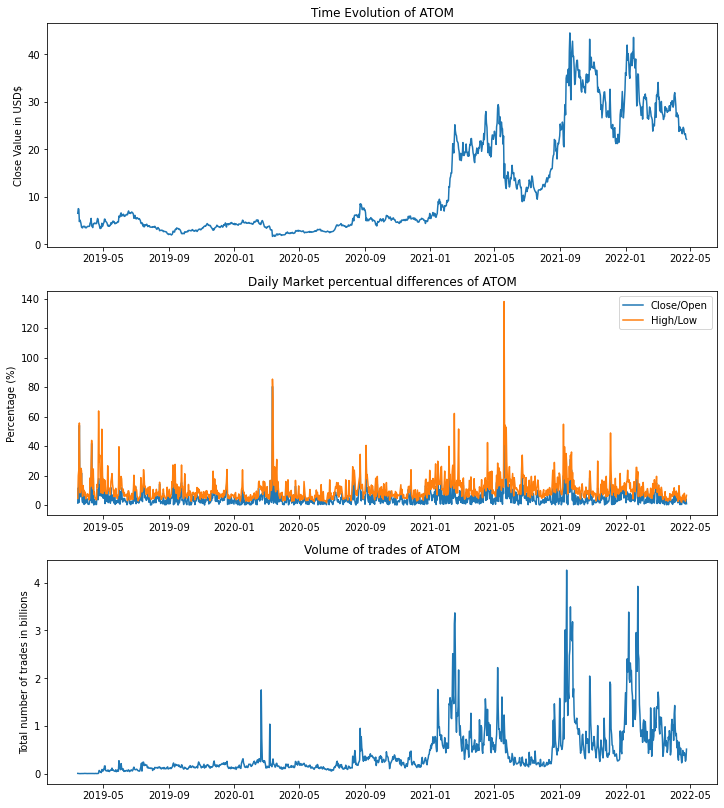

In [13]:
coin_name = plot_coinValue(df)

In [14]:
df_complete = df.copy(deep=True)
#FILTER DATASET
df = df.loc[df['Date']>= '2020-01-01']
df

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
293,2020-01-01,4.380158,4.380158,4.467644,4.204366,4.216717,107994513.0,3.731399,6.262014
294,2020-01-02,4.091817,4.091817,4.381319,4.077720,4.379122,111325337.0,7.021450,7.445309
295,2020-01-03,4.247897,4.247897,4.356596,4.015515,4.105868,138617691.0,3.343520,8.494082
296,2020-01-04,4.286356,4.286356,4.385617,4.233593,4.245741,90718305.0,0.947543,3.590893
297,2020-01-05,4.231877,4.231877,4.395146,4.215782,4.284225,115399788.0,1.236996,4.254578
...,...,...,...,...,...,...,...,...,...
1134,2022-04-21,23.305845,23.305845,24.913876,23.070230,24.290905,441027946.0,4.226664,7.991446
1135,2022-04-22,23.089931,23.089931,23.845695,22.957436,23.305815,404175037.0,0.934967,3.869160
1136,2022-04-23,23.271534,23.271534,23.452826,22.864717,23.089521,262237459.0,0.782125,2.572120
1137,2022-04-24,22.330360,22.330360,23.259838,22.315559,23.259838,296530518.0,4.162394,4.231481


# BUILDING LSTM MODEL

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(30, df)
windowed_df['Date'] = df.iloc[30:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue_5daysBefore,closeValue_6daysBefore,closeValue_7daysBefore,closeValue_8daysBefore,closeValue_9daysBefore,closeValue_10daysBefore,closeValue_11daysBefore,closeValue_12daysBefore,closeValue_13daysBefore,closeValue_14daysBefore,closeValue_15daysBefore,closeValue_16daysBefore,closeValue_17daysBefore,closeValue_18daysBefore,closeValue_19daysBefore,closeValue_20daysBefore,closeValue_21daysBefore,closeValue_22daysBefore,closeValue_23daysBefore,closeValue_24daysBefore,closeValue_25daysBefore,closeValue_26daysBefore,closeValue_27daysBefore,closeValue_28daysBefore,closeValue_29daysBefore,closeValue_30daysBefore,closeValue,Date
0,4.414964,4.412857,4.586640,4.517700,4.480583,4.415065,4.484531,4.444535,4.652062,4.649427,4.505304,4.518617,4.633349,5.001200,5.076302,4.567896,4.539908,4.255969,4.262907,4.275180,4.263615,4.263191,4.010639,4.096040,4.104942,4.231877,4.286356,4.247897,4.091817,4.380158,4.389513,2020-01-31
1,4.389513,4.414964,4.412857,4.586640,4.517700,4.480583,4.415065,4.484531,4.444535,4.652062,4.649427,4.505304,4.518617,4.633349,5.001200,5.076302,4.567896,4.539908,4.255969,4.262907,4.275180,4.263615,4.263191,4.010639,4.096040,4.104942,4.231877,4.286356,4.247897,4.091817,4.376357,2020-02-01
2,4.376357,4.389513,4.414964,4.412857,4.586640,4.517700,4.480583,4.415065,4.484531,4.444535,4.652062,4.649427,4.505304,4.518617,4.633349,5.001200,5.076302,4.567896,4.539908,4.255969,4.262907,4.275180,4.263615,4.263191,4.010639,4.096040,4.104942,4.231877,4.286356,4.247897,4.406765,2020-02-02
3,4.406765,4.376357,4.389513,4.414964,4.412857,4.586640,4.517700,4.480583,4.415065,4.484531,4.444535,4.652062,4.649427,4.505304,4.518617,4.633349,5.001200,5.076302,4.567896,4.539908,4.255969,4.262907,4.275180,4.263615,4.263191,4.010639,4.096040,4.104942,4.231877,4.286356,4.260727,2020-02-03
4,4.260727,4.406765,4.376357,4.389513,4.414964,4.412857,4.586640,4.517700,4.480583,4.415065,4.484531,4.444535,4.652062,4.649427,4.505304,4.518617,4.633349,5.001200,5.076302,4.567896,4.539908,4.255969,4.262907,4.275180,4.263615,4.263191,4.010639,4.096040,4.104942,4.231877,4.216974,2020-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,24.292837,24.646391,24.055586,23.297098,24.196865,24.109035,23.972370,24.703436,24.645935,23.785769,26.590843,27.279665,26.872952,27.722088,26.897236,29.325708,30.891443,31.960297,31.389738,29.387047,28.895994,30.103006,30.267681,29.455870,29.893732,28.818962,28.131601,29.193338,28.210022,28.044510,23.305845,2022-04-21
812,23.305845,24.292837,24.646391,24.055586,23.297098,24.196865,24.109035,23.972370,24.703436,24.645935,23.785769,26.590843,27.279665,26.872952,27.722088,26.897236,29.325708,30.891443,31.960297,31.389738,29.387047,28.895994,30.103006,30.267681,29.455870,29.893732,28.818962,28.131601,29.193338,28.210022,23.089931,2022-04-22
813,23.089931,23.305845,24.292837,24.646391,24.055586,23.297098,24.196865,24.109035,23.972370,24.703436,24.645935,23.785769,26.590843,27.279665,26.872952,27.722088,26.897236,29.325708,30.891443,31.960297,31.389738,29.387047,28.895994,30.103006,30.267681,29.455870,29.893732,28.818962,28.131601,29.193338,23.271534,2022-04-23
814,23.271534,23.089931,23.305845,24.292837,24.646391,24.055586,23.297098,24.196865,24.109035,23.972370,24.703436,24.645935,23.785769,26.590843,27.279665,26.872952,27.722088,26.897236,29.325708,30.891443,31.960297,31.389738,29.387047,28.895994,30.103006,30.267681,29.455870,29.893732,28.818962,28.131601,22.330360,2022-04-24


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((816,), (816, 30, 1), (816,))

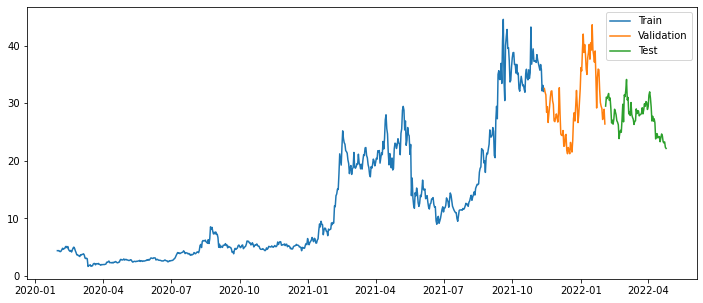

In [18]:
#Partition for train, validation and test

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## Get Best Parameters for LSTM

In [19]:
#!pip install tensorflow

In [21]:
import os
os.environ['PYTHONHASHSEED']= '0'
import numpy as np
np.random.seed(1)
import random as rn
rn.seed(1)
import tensorflow as tf
tf.random.set_seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

# Function to create LSTM model and compute the MSE value for the given parameters
def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
    
    # create model
    model = Sequential([layers.Input((30, 1)),
                        layers.LSTM(64),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(1)])
    # Compile model
    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
    
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
    
    test_predictions = model.predict(X_test).flatten()
    
    LSTM_mse = mean_squared_error(y_test, test_predictions)
    
    return LSTM_mse

#Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
    
    best_score = float('inf')
    
    for b in batch_size:
        for e in epochs:
            for l in learn_rate:
                
                try:
                    mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
                    if mse < best_score:
                        best_score = mse
                        print('MSE=%.3f' % (mse))
                        print('Batch Size: ' + str(b))
                        print('Number of Epochs: ' + str(e))
                        print('Value of Learning Rate: ' + str(l))
                        
                        top_params = [b, e, l]
                except:
                    continue
                    
    print('Best MSE=%.3f' % (best_score))
    print('Optimal Batch Size: ' + str(top_params[0]))
    print('Optimal Number of Epochs: ' + str(top_params[1]))
    print('Optimal Value of Learning Rate: ' + str(top_params[2]))
                        

# define parameters
batch_size = [10, 100, 1000]
epochs = [50, 100]
learn_rate = [0.001, 0.07, 0.01, 0.1]

warnings.filterwarnings("ignore")
search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

Epoch 1/50
66/66 - 3s - loss: 102.4162 - mean_absolute_error: 7.3730 - val_loss: 188.9826 - val_mean_absolute_error: 12.6458 - 3s/epoch - 49ms/step
Epoch 2/50
66/66 - 1s - loss: 122.3779 - mean_absolute_error: 8.6292 - val_loss: 159.3593 - val_mean_absolute_error: 11.2311 - 727ms/epoch - 11ms/step
Epoch 3/50
66/66 - 1s - loss: 47.4860 - mean_absolute_error: 5.1788 - val_loss: 61.8291 - val_mean_absolute_error: 6.2651 - 704ms/epoch - 11ms/step
Epoch 4/50
66/66 - 1s - loss: 48.2558 - mean_absolute_error: 4.9011 - val_loss: 95.6651 - val_mean_absolute_error: 7.9697 - 860ms/epoch - 13ms/step
Epoch 5/50
66/66 - 1s - loss: 37.2490 - mean_absolute_error: 4.1307 - val_loss: 75.3832 - val_mean_absolute_error: 6.8517 - 887ms/epoch - 13ms/step
Epoch 6/50
66/66 - 1s - loss: 32.3756 - mean_absolute_error: 3.8090 - val_loss: 58.5532 - val_mean_absolute_error: 5.9364 - 1s/epoch - 17ms/step
Epoch 7/50
66/66 - 1s - loss: 29.6353 - mean_absolute_error: 3.5877 - val_loss: 51.7803 - val_mean_absolute_erro

Epoch 6/50
66/66 - 1s - loss: 116.1947 - mean_absolute_error: 8.0360 - val_loss: 461.3149 - val_mean_absolute_error: 20.6970 - 895ms/epoch - 14ms/step
Epoch 7/50
66/66 - 1s - loss: 113.0207 - mean_absolute_error: 8.2950 - val_loss: 425.2729 - val_mean_absolute_error: 19.8072 - 911ms/epoch - 14ms/step
Epoch 8/50
66/66 - 1s - loss: 112.2982 - mean_absolute_error: 8.4877 - val_loss: 402.1251 - val_mean_absolute_error: 19.2140 - 893ms/epoch - 14ms/step
Epoch 9/50
66/66 - 1s - loss: 112.4473 - mean_absolute_error: 8.6200 - val_loss: 387.1834 - val_mean_absolute_error: 18.8211 - 912ms/epoch - 14ms/step
Epoch 10/50
66/66 - 1s - loss: 112.8264 - mean_absolute_error: 8.7112 - val_loss: 377.5142 - val_mean_absolute_error: 18.5625 - 980ms/epoch - 15ms/step
Epoch 11/50
66/66 - 1s - loss: 113.2008 - mean_absolute_error: 8.7739 - val_loss: 371.2501 - val_mean_absolute_error: 18.3930 - 963ms/epoch - 15ms/step
Epoch 12/50
66/66 - 1s - loss: 113.5026 - mean_absolute_error: 8.8166 - val_loss: 367.1907 -

Epoch 11/50
66/66 - 1s - loss: 117.5283 - mean_absolute_error: 7.8166 - val_loss: 40.2052 - val_mean_absolute_error: 4.9199 - 843ms/epoch - 13ms/step
Epoch 12/50
66/66 - 1s - loss: 89.4171 - mean_absolute_error: 7.1325 - val_loss: 57.6647 - val_mean_absolute_error: 6.0375 - 879ms/epoch - 13ms/step
Epoch 13/50
66/66 - 1s - loss: 101.9338 - mean_absolute_error: 7.8342 - val_loss: 40.5454 - val_mean_absolute_error: 5.4999 - 913ms/epoch - 14ms/step
Epoch 14/50
66/66 - 1s - loss: 129.2320 - mean_absolute_error: 8.5003 - val_loss: 127.9119 - val_mean_absolute_error: 9.6915 - 957ms/epoch - 15ms/step
Epoch 15/50
66/66 - 1s - loss: 76.8457 - mean_absolute_error: 6.6445 - val_loss: 109.5147 - val_mean_absolute_error: 8.5896 - 861ms/epoch - 13ms/step
Epoch 16/50
66/66 - 1s - loss: 59.2051 - mean_absolute_error: 5.4635 - val_loss: 42.9579 - val_mean_absolute_error: 5.3941 - 931ms/epoch - 14ms/step
Epoch 17/50
66/66 - 1s - loss: 79.8358 - mean_absolute_error: 6.3299 - val_loss: 146.5023 - val_mean_

Epoch 16/50
66/66 - 1s - loss: 116.1900 - mean_absolute_error: 9.0034 - val_loss: 354.6049 - val_mean_absolute_error: 17.9348 - 968ms/epoch - 15ms/step
Epoch 17/50
66/66 - 1s - loss: 116.2031 - mean_absolute_error: 9.0042 - val_loss: 354.5702 - val_mean_absolute_error: 17.9338 - 967ms/epoch - 15ms/step
Epoch 18/50
66/66 - 1s - loss: 116.2137 - mean_absolute_error: 9.0048 - val_loss: 354.5469 - val_mean_absolute_error: 17.9332 - 1s/epoch - 17ms/step
Epoch 19/50
66/66 - 1s - loss: 116.2223 - mean_absolute_error: 9.0052 - val_loss: 354.5298 - val_mean_absolute_error: 17.9327 - 1s/epoch - 16ms/step
Epoch 20/50
66/66 - 1s - loss: 116.2297 - mean_absolute_error: 9.0056 - val_loss: 354.5164 - val_mean_absolute_error: 17.9323 - 887ms/epoch - 13ms/step
Epoch 21/50
66/66 - 1s - loss: 116.2362 - mean_absolute_error: 9.0059 - val_loss: 354.5055 - val_mean_absolute_error: 17.9320 - 934ms/epoch - 14ms/step
Epoch 22/50
66/66 - 1s - loss: 116.2418 - mean_absolute_error: 9.0062 - val_loss: 354.4962 - v

Epoch 21/100
66/66 - 1s - loss: 8.4732 - mean_absolute_error: 1.7834 - val_loss: 52.1963 - val_mean_absolute_error: 6.0976 - 1s/epoch - 20ms/step
Epoch 22/100
66/66 - 1s - loss: 8.1858 - mean_absolute_error: 1.8989 - val_loss: 45.5656 - val_mean_absolute_error: 5.6172 - 1s/epoch - 21ms/step
Epoch 23/100
66/66 - 1s - loss: 8.9650 - mean_absolute_error: 1.9183 - val_loss: 44.4614 - val_mean_absolute_error: 5.6909 - 1s/epoch - 16ms/step
Epoch 24/100
66/66 - 1s - loss: 6.3831 - mean_absolute_error: 1.5927 - val_loss: 42.8693 - val_mean_absolute_error: 5.3716 - 876ms/epoch - 13ms/step
Epoch 25/100
66/66 - 1s - loss: 7.6707 - mean_absolute_error: 1.7248 - val_loss: 42.2965 - val_mean_absolute_error: 5.3975 - 933ms/epoch - 14ms/step
Epoch 26/100
66/66 - 1s - loss: 6.5854 - mean_absolute_error: 1.6200 - val_loss: 33.7806 - val_mean_absolute_error: 4.8999 - 1s/epoch - 16ms/step
Epoch 27/100
66/66 - 2s - loss: 5.3815 - mean_absolute_error: 1.4813 - val_loss: 48.7151 - val_mean_absolute_error: 5.

66/66 - 2s - loss: 64.4936 - mean_absolute_error: 5.1456 - val_loss: 90.3483 - val_mean_absolute_error: 7.8564 - 2s/epoch - 24ms/step
Epoch 78/100
66/66 - 2s - loss: 64.9664 - mean_absolute_error: 5.0594 - val_loss: 116.1921 - val_mean_absolute_error: 9.1032 - 2s/epoch - 25ms/step
Epoch 79/100
66/66 - 2s - loss: 64.0543 - mean_absolute_error: 4.9822 - val_loss: 147.9703 - val_mean_absolute_error: 10.6222 - 2s/epoch - 25ms/step
Epoch 80/100
66/66 - 2s - loss: 41.4137 - mean_absolute_error: 3.9405 - val_loss: 88.3993 - val_mean_absolute_error: 7.5249 - 2s/epoch - 23ms/step
Epoch 81/100
66/66 - 2s - loss: 42.0345 - mean_absolute_error: 3.9621 - val_loss: 83.5621 - val_mean_absolute_error: 7.1794 - 2s/epoch - 24ms/step
Epoch 82/100
66/66 - 2s - loss: 35.4142 - mean_absolute_error: 3.6547 - val_loss: 66.3343 - val_mean_absolute_error: 6.2230 - 2s/epoch - 25ms/step
Epoch 83/100
66/66 - 2s - loss: 29.6656 - mean_absolute_error: 3.3113 - val_loss: 45.7589 - val_mean_absolute_error: 5.4044 - 2s

Epoch 32/100
66/66 - 1s - loss: 118.8546 - mean_absolute_error: 9.0174 - val_loss: 369.9208 - val_mean_absolute_error: 18.3568 - 1s/epoch - 22ms/step
Epoch 33/100
66/66 - 1s - loss: 117.9771 - mean_absolute_error: 8.9797 - val_loss: 370.9391 - val_mean_absolute_error: 18.3845 - 1s/epoch - 19ms/step
Epoch 34/100
66/66 - 1s - loss: 117.1432 - mean_absolute_error: 8.9448 - val_loss: 371.5031 - val_mean_absolute_error: 18.3999 - 1s/epoch - 19ms/step
Epoch 35/100
66/66 - 2s - loss: 116.3725 - mean_absolute_error: 8.9146 - val_loss: 371.5673 - val_mean_absolute_error: 18.4016 - 2s/epoch - 23ms/step
Epoch 36/100
66/66 - 2s - loss: 115.6874 - mean_absolute_error: 8.8896 - val_loss: 371.1179 - val_mean_absolute_error: 18.3894 - 2s/epoch - 23ms/step
Epoch 37/100
66/66 - 1s - loss: 115.1099 - mean_absolute_error: 8.8711 - val_loss: 370.1902 - val_mean_absolute_error: 18.3642 - 1s/epoch - 19ms/step
Epoch 38/100
66/66 - 1s - loss: 114.6578 - mean_absolute_error: 8.8604 - val_loss: 368.8798 - val_me

Epoch 87/100
66/66 - 1s - loss: 114.3189 - mean_absolute_error: 8.9052 - val_loss: 359.5706 - val_mean_absolute_error: 18.0727 - 1s/epoch - 17ms/step
Epoch 88/100
66/66 - 1s - loss: 114.3193 - mean_absolute_error: 8.9052 - val_loss: 359.5695 - val_mean_absolute_error: 18.0727 - 1s/epoch - 21ms/step
Epoch 89/100
66/66 - 1s - loss: 114.3197 - mean_absolute_error: 8.9053 - val_loss: 359.5686 - val_mean_absolute_error: 18.0727 - 1s/epoch - 18ms/step
Epoch 90/100
66/66 - 1s - loss: 114.3201 - mean_absolute_error: 8.9053 - val_loss: 359.5677 - val_mean_absolute_error: 18.0726 - 1s/epoch - 18ms/step
Epoch 91/100
66/66 - 1s - loss: 114.3205 - mean_absolute_error: 8.9053 - val_loss: 359.5669 - val_mean_absolute_error: 18.0726 - 1s/epoch - 17ms/step
Epoch 92/100
66/66 - 1s - loss: 114.3208 - mean_absolute_error: 8.9053 - val_loss: 359.5660 - val_mean_absolute_error: 18.0726 - 982ms/epoch - 15ms/step
Epoch 93/100
66/66 - 1s - loss: 114.3211 - mean_absolute_error: 8.9053 - val_loss: 359.5652 - val

Epoch 42/100
66/66 - 1s - loss: 41.7855 - mean_absolute_error: 4.2865 - val_loss: 63.8218 - val_mean_absolute_error: 6.1818 - 1s/epoch - 15ms/step
Epoch 43/100
66/66 - 1s - loss: 44.3214 - mean_absolute_error: 4.5743 - val_loss: 80.2633 - val_mean_absolute_error: 6.6468 - 971ms/epoch - 15ms/step
Epoch 44/100
66/66 - 1s - loss: 38.8035 - mean_absolute_error: 4.2687 - val_loss: 80.1813 - val_mean_absolute_error: 6.6141 - 946ms/epoch - 14ms/step
Epoch 45/100
66/66 - 1s - loss: 33.0159 - mean_absolute_error: 3.8237 - val_loss: 74.3003 - val_mean_absolute_error: 6.5448 - 948ms/epoch - 14ms/step
Epoch 46/100
66/66 - 1s - loss: 32.8770 - mean_absolute_error: 3.7148 - val_loss: 75.5996 - val_mean_absolute_error: 6.6766 - 971ms/epoch - 15ms/step
Epoch 47/100
66/66 - 1s - loss: 34.6774 - mean_absolute_error: 3.8911 - val_loss: 74.9795 - val_mean_absolute_error: 6.8285 - 1s/epoch - 16ms/step
Epoch 48/100
66/66 - 1s - loss: 28.7755 - mean_absolute_error: 3.4220 - val_loss: 73.8407 - val_mean_absol

Epoch 98/100
66/66 - 1s - loss: 8.4204 - mean_absolute_error: 1.9744 - val_loss: 22.5267 - val_mean_absolute_error: 3.9838 - 1s/epoch - 18ms/step
Epoch 99/100
66/66 - 1s - loss: 9.2973 - mean_absolute_error: 2.1976 - val_loss: 21.5679 - val_mean_absolute_error: 3.7998 - 1s/epoch - 19ms/step
Epoch 100/100
66/66 - 1s - loss: 8.5516 - mean_absolute_error: 1.9123 - val_loss: 22.3405 - val_mean_absolute_error: 3.7632 - 1s/epoch - 19ms/step
Epoch 1/100
66/66 - 4s - loss: 75.1050 - mean_absolute_error: 4.7768 - val_loss: 230.8926 - val_mean_absolute_error: 14.0720 - 4s/epoch - 66ms/step
Epoch 2/100
66/66 - 1s - loss: 276.5613 - mean_absolute_error: 12.8049 - val_loss: 716.9971 - val_mean_absolute_error: 26.1543 - 997ms/epoch - 15ms/step
Epoch 3/100
66/66 - 1s - loss: 120.6137 - mean_absolute_error: 7.1413 - val_loss: 415.3203 - val_mean_absolute_error: 19.5543 - 1s/epoch - 15ms/step
Epoch 4/100
66/66 - 1s - loss: 122.1219 - mean_absolute_error: 8.9583 - val_loss: 325.4735 - val_mean_absolute_

Epoch 53/100
66/66 - 1s - loss: 116.2882 - mean_absolute_error: 9.0083 - val_loss: 354.4305 - val_mean_absolute_error: 17.9299 - 968ms/epoch - 15ms/step
Epoch 54/100
66/66 - 1s - loss: 116.2890 - mean_absolute_error: 9.0084 - val_loss: 354.4286 - val_mean_absolute_error: 17.9299 - 970ms/epoch - 15ms/step
Epoch 55/100
66/66 - 1s - loss: 116.2899 - mean_absolute_error: 9.0084 - val_loss: 354.4269 - val_mean_absolute_error: 17.9298 - 990ms/epoch - 15ms/step
Epoch 56/100
66/66 - 1s - loss: 116.2906 - mean_absolute_error: 9.0084 - val_loss: 354.4252 - val_mean_absolute_error: 17.9298 - 949ms/epoch - 14ms/step
Epoch 57/100
66/66 - 1s - loss: 116.2914 - mean_absolute_error: 9.0085 - val_loss: 354.4238 - val_mean_absolute_error: 17.9298 - 943ms/epoch - 14ms/step
Epoch 58/100
66/66 - 1s - loss: 116.2920 - mean_absolute_error: 9.0085 - val_loss: 354.4222 - val_mean_absolute_error: 17.9297 - 963ms/epoch - 15ms/step
Epoch 59/100
66/66 - 1s - loss: 116.2926 - mean_absolute_error: 9.0085 - val_loss:

Epoch 8/50
7/7 - 0s - loss: 128.5884 - mean_absolute_error: 7.8321 - val_loss: 561.6442 - val_mean_absolute_error: 23.0698 - 327ms/epoch - 47ms/step
Epoch 9/50
7/7 - 0s - loss: 112.7411 - mean_absolute_error: 7.7589 - val_loss: 471.9501 - val_mean_absolute_error: 21.0223 - 367ms/epoch - 52ms/step
Epoch 10/50
7/7 - 0s - loss: 98.6925 - mean_absolute_error: 7.4524 - val_loss: 395.0322 - val_mean_absolute_error: 19.0814 - 420ms/epoch - 60ms/step
Epoch 11/50
7/7 - 0s - loss: 82.9100 - mean_absolute_error: 6.7072 - val_loss: 328.4958 - val_mean_absolute_error: 17.2304 - 349ms/epoch - 50ms/step
Epoch 12/50
7/7 - 0s - loss: 63.3388 - mean_absolute_error: 5.3330 - val_loss: 266.4444 - val_mean_absolute_error: 15.3131 - 312ms/epoch - 45ms/step
Epoch 13/50
7/7 - 0s - loss: 48.2705 - mean_absolute_error: 4.2497 - val_loss: 208.0503 - val_mean_absolute_error: 13.2642 - 330ms/epoch - 47ms/step
Epoch 14/50
7/7 - 0s - loss: 38.6462 - mean_absolute_error: 3.7110 - val_loss: 158.6019 - val_mean_absolut

Epoch 14/50
7/7 - 0s - loss: 60.7566 - mean_absolute_error: 5.4127 - val_loss: 87.6761 - val_mean_absolute_error: 6.9169 - 286ms/epoch - 41ms/step
Epoch 15/50
7/7 - 0s - loss: 41.3238 - mean_absolute_error: 4.3182 - val_loss: 45.4932 - val_mean_absolute_error: 5.3690 - 291ms/epoch - 42ms/step
Epoch 16/50
7/7 - 0s - loss: 79.7347 - mean_absolute_error: 7.0025 - val_loss: 165.9011 - val_mean_absolute_error: 10.4389 - 352ms/epoch - 50ms/step
Epoch 17/50
7/7 - 0s - loss: 42.5339 - mean_absolute_error: 4.6609 - val_loss: 86.3359 - val_mean_absolute_error: 8.1268 - 385ms/epoch - 55ms/step
Epoch 18/50
7/7 - 0s - loss: 99.4860 - mean_absolute_error: 8.2162 - val_loss: 45.1946 - val_mean_absolute_error: 5.8691 - 378ms/epoch - 54ms/step
Epoch 19/50
7/7 - 0s - loss: 81.1872 - mean_absolute_error: 5.2716 - val_loss: 67.1265 - val_mean_absolute_error: 6.0665 - 290ms/epoch - 41ms/step
Epoch 20/50
7/7 - 0s - loss: 55.2132 - mean_absolute_error: 4.9638 - val_loss: 111.9214 - val_mean_absolute_error: 8

Epoch 20/50
7/7 - 0s - loss: 29.3613 - mean_absolute_error: 3.7511 - val_loss: 44.0392 - val_mean_absolute_error: 5.4374 - 283ms/epoch - 40ms/step
Epoch 21/50
7/7 - 0s - loss: 27.5569 - mean_absolute_error: 4.1076 - val_loss: 45.3419 - val_mean_absolute_error: 5.9696 - 285ms/epoch - 41ms/step
Epoch 22/50
7/7 - 0s - loss: 32.1406 - mean_absolute_error: 3.9298 - val_loss: 53.9670 - val_mean_absolute_error: 5.5996 - 332ms/epoch - 47ms/step
Epoch 23/50
7/7 - 0s - loss: 25.4289 - mean_absolute_error: 3.3405 - val_loss: 66.2015 - val_mean_absolute_error: 7.2167 - 417ms/epoch - 60ms/step
Epoch 24/50
7/7 - 0s - loss: 14.9165 - mean_absolute_error: 2.4707 - val_loss: 44.0702 - val_mean_absolute_error: 5.8982 - 371ms/epoch - 53ms/step
Epoch 25/50
7/7 - 0s - loss: 13.9094 - mean_absolute_error: 2.4647 - val_loss: 57.9528 - val_mean_absolute_error: 6.6272 - 300ms/epoch - 43ms/step
Epoch 26/50
7/7 - 0s - loss: 12.0354 - mean_absolute_error: 2.1985 - val_loss: 49.1545 - val_mean_absolute_error: 6.21

Epoch 26/50
7/7 - 1s - loss: 39.1598 - mean_absolute_error: 4.6957 - val_loss: 62.7500 - val_mean_absolute_error: 6.2835 - 594ms/epoch - 85ms/step
Epoch 27/50
7/7 - 1s - loss: 31.6344 - mean_absolute_error: 3.8785 - val_loss: 64.5042 - val_mean_absolute_error: 6.4334 - 788ms/epoch - 113ms/step
Epoch 28/50
7/7 - 1s - loss: 36.1685 - mean_absolute_error: 4.3401 - val_loss: 64.9626 - val_mean_absolute_error: 6.6985 - 557ms/epoch - 80ms/step
Epoch 29/50
7/7 - 0s - loss: 29.7455 - mean_absolute_error: 3.8603 - val_loss: 69.4973 - val_mean_absolute_error: 6.6490 - 479ms/epoch - 68ms/step
Epoch 30/50
7/7 - 0s - loss: 32.0435 - mean_absolute_error: 4.0664 - val_loss: 69.2423 - val_mean_absolute_error: 7.0901 - 339ms/epoch - 48ms/step
Epoch 31/50
7/7 - 1s - loss: 29.6067 - mean_absolute_error: 3.7991 - val_loss: 70.5616 - val_mean_absolute_error: 6.9005 - 720ms/epoch - 103ms/step
Epoch 32/50
7/7 - 1s - loss: 29.5485 - mean_absolute_error: 3.8943 - val_loss: 70.0843 - val_mean_absolute_error: 7.

Epoch 32/100
7/7 - 0s - loss: 6.5748 - mean_absolute_error: 1.8637 - val_loss: 45.1077 - val_mean_absolute_error: 5.6932 - 441ms/epoch - 63ms/step
Epoch 33/100
7/7 - 0s - loss: 5.5467 - mean_absolute_error: 1.5423 - val_loss: 43.3641 - val_mean_absolute_error: 5.5996 - 381ms/epoch - 54ms/step
Epoch 34/100
7/7 - 0s - loss: 5.2212 - mean_absolute_error: 1.5203 - val_loss: 45.1015 - val_mean_absolute_error: 5.6754 - 284ms/epoch - 41ms/step
Epoch 35/100
7/7 - 0s - loss: 4.9264 - mean_absolute_error: 1.4151 - val_loss: 42.1402 - val_mean_absolute_error: 5.5251 - 271ms/epoch - 39ms/step
Epoch 36/100
7/7 - 0s - loss: 4.5411 - mean_absolute_error: 1.3555 - val_loss: 41.9339 - val_mean_absolute_error: 5.5038 - 267ms/epoch - 38ms/step
Epoch 37/100
7/7 - 0s - loss: 4.5487 - mean_absolute_error: 1.3534 - val_loss: 40.4598 - val_mean_absolute_error: 5.4032 - 286ms/epoch - 41ms/step
Epoch 38/100
7/7 - 0s - loss: 4.8257 - mean_absolute_error: 1.4614 - val_loss: 43.6822 - val_mean_absolute_error: 5.58

Epoch 88/100
7/7 - 0s - loss: 2.2779 - mean_absolute_error: 0.8980 - val_loss: 21.4662 - val_mean_absolute_error: 3.7717 - 386ms/epoch - 55ms/step
Epoch 89/100
7/7 - 0s - loss: 2.2727 - mean_absolute_error: 0.8978 - val_loss: 21.1579 - val_mean_absolute_error: 3.7418 - 375ms/epoch - 54ms/step
Epoch 90/100
7/7 - 0s - loss: 2.2294 - mean_absolute_error: 0.8849 - val_loss: 20.6608 - val_mean_absolute_error: 3.6949 - 370ms/epoch - 53ms/step
Epoch 91/100
7/7 - 0s - loss: 2.2429 - mean_absolute_error: 0.9008 - val_loss: 20.2777 - val_mean_absolute_error: 3.6603 - 370ms/epoch - 53ms/step
Epoch 92/100
7/7 - 0s - loss: 2.2458 - mean_absolute_error: 0.9032 - val_loss: 20.4248 - val_mean_absolute_error: 3.6682 - 433ms/epoch - 62ms/step
Epoch 93/100
7/7 - 0s - loss: 2.3357 - mean_absolute_error: 0.9395 - val_loss: 19.3521 - val_mean_absolute_error: 3.5803 - 409ms/epoch - 58ms/step
Epoch 94/100
7/7 - 0s - loss: 2.4610 - mean_absolute_error: 0.9806 - val_loss: 19.6236 - val_mean_absolute_error: 3.58

Epoch 44/100
7/7 - 0s - loss: 42.5981 - mean_absolute_error: 4.2900 - val_loss: 62.4822 - val_mean_absolute_error: 6.0774 - 433ms/epoch - 62ms/step
Epoch 45/100
7/7 - 1s - loss: 56.4582 - mean_absolute_error: 5.3074 - val_loss: 42.3685 - val_mean_absolute_error: 4.9155 - 600ms/epoch - 86ms/step
Epoch 46/100
7/7 - 1s - loss: 71.7647 - mean_absolute_error: 5.4574 - val_loss: 104.5946 - val_mean_absolute_error: 8.3347 - 570ms/epoch - 81ms/step
Epoch 47/100
7/7 - 0s - loss: 37.7964 - mean_absolute_error: 4.1034 - val_loss: 47.6268 - val_mean_absolute_error: 5.6721 - 468ms/epoch - 67ms/step
Epoch 48/100
7/7 - 0s - loss: 26.1679 - mean_absolute_error: 3.9454 - val_loss: 37.4333 - val_mean_absolute_error: 4.7970 - 477ms/epoch - 68ms/step
Epoch 49/100
7/7 - 0s - loss: 24.3267 - mean_absolute_error: 3.5788 - val_loss: 38.3502 - val_mean_absolute_error: 5.0821 - 361ms/epoch - 52ms/step
Epoch 50/100
7/7 - 0s - loss: 18.1300 - mean_absolute_error: 2.9348 - val_loss: 56.3054 - val_mean_absolute_err

Epoch 100/100
7/7 - 0s - loss: 10.4525 - mean_absolute_error: 2.3163 - val_loss: 20.3550 - val_mean_absolute_error: 3.7260 - 337ms/epoch - 48ms/step
MSE=9.139
Batch Size: 100
Number of Epochs: 100
Value of Learning Rate: 0.07
Epoch 1/100
7/7 - 4s - loss: 193.4056 - mean_absolute_error: 10.2799 - val_loss: 662.6257 - val_mean_absolute_error: 25.1150 - 4s/epoch - 608ms/step
Epoch 2/100
7/7 - 0s - loss: 93.4967 - mean_absolute_error: 6.6427 - val_loss: 299.3003 - val_mean_absolute_error: 16.3430 - 388ms/epoch - 55ms/step
Epoch 3/100
7/7 - 0s - loss: 91.1893 - mean_absolute_error: 8.3763 - val_loss: 168.5374 - val_mean_absolute_error: 11.5684 - 326ms/epoch - 47ms/step
Epoch 4/100
7/7 - 0s - loss: 51.2379 - mean_absolute_error: 6.0166 - val_loss: 87.3291 - val_mean_absolute_error: 7.2526 - 407ms/epoch - 58ms/step
Epoch 5/100
7/7 - 1s - loss: 28.9661 - mean_absolute_error: 3.9068 - val_loss: 38.3226 - val_mean_absolute_error: 5.1903 - 563ms/epoch - 80ms/step
Epoch 6/100
7/7 - 1s - loss: 33.5

Epoch 55/100
7/7 - 0s - loss: 19.5900 - mean_absolute_error: 2.8921 - val_loss: 32.6928 - val_mean_absolute_error: 4.5594 - 262ms/epoch - 37ms/step
Epoch 56/100
7/7 - 0s - loss: 20.0213 - mean_absolute_error: 3.1319 - val_loss: 43.0537 - val_mean_absolute_error: 5.8931 - 249ms/epoch - 36ms/step
Epoch 57/100
7/7 - 0s - loss: 13.7549 - mean_absolute_error: 2.4495 - val_loss: 29.4788 - val_mean_absolute_error: 4.4665 - 255ms/epoch - 36ms/step
Epoch 58/100
7/7 - 0s - loss: 10.0337 - mean_absolute_error: 2.1914 - val_loss: 45.7653 - val_mean_absolute_error: 5.9668 - 273ms/epoch - 39ms/step
Epoch 59/100
7/7 - 0s - loss: 8.5545 - mean_absolute_error: 2.0099 - val_loss: 32.0871 - val_mean_absolute_error: 4.9196 - 237ms/epoch - 34ms/step
Epoch 60/100
7/7 - 0s - loss: 8.2901 - mean_absolute_error: 2.0038 - val_loss: 44.5588 - val_mean_absolute_error: 5.8137 - 230ms/epoch - 33ms/step
Epoch 61/100
7/7 - 0s - loss: 13.1844 - mean_absolute_error: 2.5467 - val_loss: 30.6197 - val_mean_absolute_error:

Epoch 11/100
7/7 - 0s - loss: 166.4833 - mean_absolute_error: 8.7408 - val_loss: 690.5752 - val_mean_absolute_error: 25.6275 - 249ms/epoch - 36ms/step
Epoch 12/100
7/7 - 0s - loss: 152.9716 - mean_absolute_error: 8.5508 - val_loss: 541.4118 - val_mean_absolute_error: 22.5361 - 251ms/epoch - 36ms/step
Epoch 13/100
7/7 - 0s - loss: 57.6756 - mean_absolute_error: 4.7794 - val_loss: 121.3599 - val_mean_absolute_error: 9.4082 - 252ms/epoch - 36ms/step
Epoch 14/100
7/7 - 0s - loss: 101.4773 - mean_absolute_error: 8.3642 - val_loss: 63.7001 - val_mean_absolute_error: 6.3164 - 248ms/epoch - 35ms/step
Epoch 15/100
7/7 - 0s - loss: 46.1185 - mean_absolute_error: 4.2051 - val_loss: 167.6671 - val_mean_absolute_error: 11.5672 - 245ms/epoch - 35ms/step
Epoch 16/100
7/7 - 0s - loss: 32.3243 - mean_absolute_error: 3.7198 - val_loss: 61.4619 - val_mean_absolute_error: 6.2216 - 233ms/epoch - 33ms/step
Epoch 17/100
7/7 - 0s - loss: 60.6599 - mean_absolute_error: 5.4059 - val_loss: 54.8478 - val_mean_abs

Epoch 67/100
7/7 - 0s - loss: 47.9831 - mean_absolute_error: 4.5625 - val_loss: 77.1222 - val_mean_absolute_error: 7.0488 - 309ms/epoch - 44ms/step
Epoch 68/100
7/7 - 0s - loss: 33.8410 - mean_absolute_error: 3.6900 - val_loss: 99.7399 - val_mean_absolute_error: 7.1695 - 243ms/epoch - 35ms/step
Epoch 69/100
7/7 - 0s - loss: 28.4251 - mean_absolute_error: 3.4479 - val_loss: 82.8472 - val_mean_absolute_error: 7.7143 - 349ms/epoch - 50ms/step
Epoch 70/100
7/7 - 0s - loss: 26.2537 - mean_absolute_error: 3.3966 - val_loss: 92.2635 - val_mean_absolute_error: 8.3406 - 293ms/epoch - 42ms/step
Epoch 71/100
7/7 - 0s - loss: 23.9681 - mean_absolute_error: 3.0968 - val_loss: 92.8534 - val_mean_absolute_error: 8.3853 - 233ms/epoch - 33ms/step
Epoch 72/100
7/7 - 0s - loss: 27.8788 - mean_absolute_error: 3.7254 - val_loss: 104.6853 - val_mean_absolute_error: 8.8006 - 288ms/epoch - 41ms/step
Epoch 73/100
7/7 - 0s - loss: 30.6362 - mean_absolute_error: 3.4931 - val_loss: 130.4447 - val_mean_absolute_er

Epoch 22/50
1/1 - 0s - loss: 180.2625 - mean_absolute_error: 8.6741 - val_loss: 761.0515 - val_mean_absolute_error: 26.9967 - 210ms/epoch - 210ms/step
Epoch 23/50
1/1 - 0s - loss: 175.6583 - mean_absolute_error: 8.5006 - val_loss: 746.2594 - val_mean_absolute_error: 26.7226 - 348ms/epoch - 348ms/step
Epoch 24/50
1/1 - 0s - loss: 171.0287 - mean_absolute_error: 8.3354 - val_loss: 730.9994 - val_mean_absolute_error: 26.4371 - 258ms/epoch - 258ms/step
Epoch 25/50
1/1 - 0s - loss: 166.3757 - mean_absolute_error: 8.1871 - val_loss: 715.2631 - val_mean_absolute_error: 26.1396 - 290ms/epoch - 290ms/step
Epoch 26/50
1/1 - 0s - loss: 161.7128 - mean_absolute_error: 8.0584 - val_loss: 698.9518 - val_mean_absolute_error: 25.8277 - 213ms/epoch - 213ms/step
Epoch 27/50
1/1 - 0s - loss: 157.0386 - mean_absolute_error: 7.9605 - val_loss: 682.0196 - val_mean_absolute_error: 25.5002 - 243ms/epoch - 243ms/step
Epoch 28/50
1/1 - 0s - loss: 152.3475 - mean_absolute_error: 7.8992 - val_loss: 665.0431 - val

Epoch 27/50
1/1 - 0s - loss: 20.5914 - mean_absolute_error: 3.3175 - val_loss: 81.0592 - val_mean_absolute_error: 7.3270 - 301ms/epoch - 301ms/step
Epoch 28/50
1/1 - 0s - loss: 20.0834 - mean_absolute_error: 3.0201 - val_loss: 66.2303 - val_mean_absolute_error: 6.7157 - 249ms/epoch - 249ms/step
Epoch 29/50
1/1 - 0s - loss: 15.7305 - mean_absolute_error: 2.8306 - val_loss: 56.1749 - val_mean_absolute_error: 6.5781 - 282ms/epoch - 282ms/step
Epoch 30/50
1/1 - 0s - loss: 17.3458 - mean_absolute_error: 3.2004 - val_loss: 54.4616 - val_mean_absolute_error: 6.5339 - 336ms/epoch - 336ms/step
Epoch 31/50
1/1 - 0s - loss: 17.7944 - mean_absolute_error: 3.1118 - val_loss: 40.1817 - val_mean_absolute_error: 5.4324 - 449ms/epoch - 449ms/step
Epoch 32/50
1/1 - 0s - loss: 18.0820 - mean_absolute_error: 3.1857 - val_loss: 36.4767 - val_mean_absolute_error: 5.1693 - 355ms/epoch - 355ms/step
Epoch 33/50
1/1 - 0s - loss: 15.1435 - mean_absolute_error: 2.7734 - val_loss: 41.7725 - val_mean_absolute_error

Epoch 32/50
1/1 - 0s - loss: 10.5564 - mean_absolute_error: 1.9246 - val_loss: 39.1352 - val_mean_absolute_error: 5.3601 - 230ms/epoch - 230ms/step
Epoch 33/50
1/1 - 0s - loss: 9.9230 - mean_absolute_error: 1.9734 - val_loss: 40.9307 - val_mean_absolute_error: 5.5306 - 232ms/epoch - 232ms/step
Epoch 34/50
1/1 - 0s - loss: 9.4659 - mean_absolute_error: 2.0096 - val_loss: 43.5674 - val_mean_absolute_error: 5.7538 - 252ms/epoch - 252ms/step
Epoch 35/50
1/1 - 0s - loss: 9.0704 - mean_absolute_error: 1.8771 - val_loss: 45.7653 - val_mean_absolute_error: 5.8994 - 231ms/epoch - 231ms/step
Epoch 36/50
1/1 - 0s - loss: 8.7199 - mean_absolute_error: 1.8129 - val_loss: 47.4228 - val_mean_absolute_error: 5.9730 - 221ms/epoch - 221ms/step
Epoch 37/50
1/1 - 0s - loss: 8.2552 - mean_absolute_error: 1.8576 - val_loss: 54.9636 - val_mean_absolute_error: 6.3380 - 221ms/epoch - 221ms/step
Epoch 38/50
1/1 - 0s - loss: 7.1281 - mean_absolute_error: 1.7119 - val_loss: 56.8536 - val_mean_absolute_error: 6.49

Epoch 38/50
1/1 - 0s - loss: 26.0407 - mean_absolute_error: 3.2754 - val_loss: 61.8820 - val_mean_absolute_error: 6.5972 - 251ms/epoch - 251ms/step
Epoch 39/50
1/1 - 0s - loss: 25.5872 - mean_absolute_error: 3.2086 - val_loss: 61.9018 - val_mean_absolute_error: 6.3352 - 227ms/epoch - 227ms/step
Epoch 40/50
1/1 - 0s - loss: 24.6103 - mean_absolute_error: 3.1315 - val_loss: 66.2922 - val_mean_absolute_error: 6.3452 - 219ms/epoch - 219ms/step
Epoch 41/50
1/1 - 0s - loss: 24.6966 - mean_absolute_error: 3.1119 - val_loss: 71.6469 - val_mean_absolute_error: 6.4333 - 227ms/epoch - 227ms/step
Epoch 42/50
1/1 - 0s - loss: 25.3103 - mean_absolute_error: 3.1361 - val_loss: 71.8268 - val_mean_absolute_error: 6.4497 - 259ms/epoch - 259ms/step
Epoch 43/50
1/1 - 0s - loss: 25.0315 - mean_absolute_error: 3.1072 - val_loss: 67.6481 - val_mean_absolute_error: 6.4069 - 247ms/epoch - 247ms/step
Epoch 44/50
1/1 - 0s - loss: 24.2372 - mean_absolute_error: 3.0596 - val_loss: 64.4412 - val_mean_absolute_error

Epoch 43/100
1/1 - 1s - loss: 148.8564 - mean_absolute_error: 8.2287 - val_loss: 661.0145 - val_mean_absolute_error: 25.1252 - 828ms/epoch - 828ms/step
Epoch 44/100
1/1 - 1s - loss: 145.1811 - mean_absolute_error: 8.2246 - val_loss: 642.7360 - val_mean_absolute_error: 24.7589 - 614ms/epoch - 614ms/step
Epoch 45/100
1/1 - 1s - loss: 141.5839 - mean_absolute_error: 8.2206 - val_loss: 624.0105 - val_mean_absolute_error: 24.3770 - 863ms/epoch - 863ms/step
Epoch 46/100
1/1 - 1s - loss: 138.0712 - mean_absolute_error: 8.2165 - val_loss: 605.0206 - val_mean_absolute_error: 23.9826 - 1s/epoch - 1s/step
Epoch 47/100
1/1 - 2s - loss: 134.6767 - mean_absolute_error: 8.2136 - val_loss: 585.9561 - val_mean_absolute_error: 23.5792 - 2s/epoch - 2s/step
Epoch 48/100
1/1 - 1s - loss: 131.4093 - mean_absolute_error: 8.2132 - val_loss: 566.9664 - val_mean_absolute_error: 23.1699 - 763ms/epoch - 763ms/step
Epoch 49/100
1/1 - 1s - loss: 128.2773 - mean_absolute_error: 8.2145 - val_loss: 548.2216 - val_mean

Epoch 98/100
1/1 - 0s - loss: 25.7644 - mean_absolute_error: 3.2449 - val_loss: 73.3442 - val_mean_absolute_error: 6.8237 - 365ms/epoch - 365ms/step
Epoch 99/100
1/1 - 0s - loss: 25.0294 - mean_absolute_error: 3.2244 - val_loss: 68.0559 - val_mean_absolute_error: 6.5441 - 362ms/epoch - 362ms/step
Epoch 100/100
1/1 - 1s - loss: 24.4074 - mean_absolute_error: 3.2026 - val_loss: 63.3910 - val_mean_absolute_error: 6.2891 - 541ms/epoch - 541ms/step
Epoch 1/100
1/1 - 16s - loss: 241.8892 - mean_absolute_error: 11.5861 - val_loss: 376.3229 - val_mean_absolute_error: 18.6363 - 16s/epoch - 16s/step
Epoch 2/100
1/1 - 1s - loss: 138.2352 - mean_absolute_error: 10.2203 - val_loss: 628.5268 - val_mean_absolute_error: 24.3978 - 744ms/epoch - 744ms/step
Epoch 3/100
1/1 - 1s - loss: 144.0807 - mean_absolute_error: 7.5347 - val_loss: 422.8639 - val_mean_absolute_error: 19.7419 - 713ms/epoch - 713ms/step
Epoch 4/100
1/1 - 1s - loss: 98.7411 - mean_absolute_error: 7.2026 - val_loss: 166.2100 - val_mean_a

Epoch 53/100
1/1 - 0s - loss: 16.4304 - mean_absolute_error: 2.4612 - val_loss: 63.6263 - val_mean_absolute_error: 6.9307 - 429ms/epoch - 429ms/step
Epoch 54/100
1/1 - 1s - loss: 15.5517 - mean_absolute_error: 2.4789 - val_loss: 64.0465 - val_mean_absolute_error: 7.0343 - 522ms/epoch - 522ms/step
Epoch 55/100
1/1 - 1s - loss: 14.0592 - mean_absolute_error: 2.3811 - val_loss: 58.9194 - val_mean_absolute_error: 6.3738 - 561ms/epoch - 561ms/step
Epoch 56/100
1/1 - 1s - loss: 14.7713 - mean_absolute_error: 2.3518 - val_loss: 70.5210 - val_mean_absolute_error: 7.5202 - 645ms/epoch - 645ms/step
Epoch 57/100
1/1 - 1s - loss: 11.9281 - mean_absolute_error: 2.2307 - val_loss: 73.0852 - val_mean_absolute_error: 7.6646 - 520ms/epoch - 520ms/step
Epoch 58/100
1/1 - 1s - loss: 10.3253 - mean_absolute_error: 2.0221 - val_loss: 58.3032 - val_mean_absolute_error: 6.4986 - 571ms/epoch - 571ms/step
Epoch 59/100
1/1 - 1s - loss: 10.1132 - mean_absolute_error: 1.8944 - val_loss: 57.9900 - val_mean_absolut

Epoch 9/100
1/1 - 0s - loss: 106.5633 - mean_absolute_error: 8.6705 - val_loss: 256.6097 - val_mean_absolute_error: 14.9774 - 434ms/epoch - 434ms/step
Epoch 10/100
1/1 - 1s - loss: 108.9555 - mean_absolute_error: 9.1950 - val_loss: 212.4806 - val_mean_absolute_error: 13.4024 - 558ms/epoch - 558ms/step
Epoch 11/100
1/1 - 0s - loss: 109.2979 - mean_absolute_error: 9.3342 - val_loss: 199.0767 - val_mean_absolute_error: 12.8713 - 491ms/epoch - 491ms/step
Epoch 12/100
1/1 - 0s - loss: 102.8911 - mean_absolute_error: 9.0833 - val_loss: 204.2242 - val_mean_absolute_error: 13.0505 - 479ms/epoch - 479ms/step
Epoch 13/100
1/1 - 0s - loss: 90.9807 - mean_absolute_error: 8.4466 - val_loss: 220.5254 - val_mean_absolute_error: 13.6324 - 460ms/epoch - 460ms/step
Epoch 14/100
1/1 - 0s - loss: 78.7031 - mean_absolute_error: 7.5714 - val_loss: 240.3832 - val_mean_absolute_error: 14.3148 - 443ms/epoch - 443ms/step
Epoch 15/100
1/1 - 0s - loss: 70.3904 - mean_absolute_error: 6.7154 - val_loss: 252.1151 - 

Epoch 64/100
1/1 - 0s - loss: 10.1843 - mean_absolute_error: 2.1901 - val_loss: 56.8266 - val_mean_absolute_error: 6.7794 - 440ms/epoch - 440ms/step
Epoch 65/100
1/1 - 0s - loss: 9.8072 - mean_absolute_error: 2.1715 - val_loss: 52.0457 - val_mean_absolute_error: 6.3702 - 401ms/epoch - 401ms/step
Epoch 66/100
1/1 - 0s - loss: 10.5195 - mean_absolute_error: 2.1468 - val_loss: 49.6037 - val_mean_absolute_error: 6.1169 - 468ms/epoch - 468ms/step
Epoch 67/100
1/1 - 0s - loss: 10.9630 - mean_absolute_error: 2.0992 - val_loss: 47.4177 - val_mean_absolute_error: 5.9575 - 435ms/epoch - 435ms/step
Epoch 68/100
1/1 - 1s - loss: 10.4205 - mean_absolute_error: 1.9865 - val_loss: 46.0950 - val_mean_absolute_error: 5.9108 - 505ms/epoch - 505ms/step
Epoch 69/100
1/1 - 1s - loss: 9.2294 - mean_absolute_error: 1.8321 - val_loss: 46.2741 - val_mean_absolute_error: 5.9947 - 505ms/epoch - 505ms/step
Epoch 70/100
1/1 - 0s - loss: 8.8192 - mean_absolute_error: 1.9710 - val_loss: 47.6511 - val_mean_absolute_e

Epoch 20/100
1/1 - 1s - loss: 29.8908 - mean_absolute_error: 3.6891 - val_loss: 49.5860 - val_mean_absolute_error: 5.4113 - 528ms/epoch - 528ms/step
Epoch 21/100
1/1 - 0s - loss: 26.6469 - mean_absolute_error: 3.5889 - val_loss: 44.3484 - val_mean_absolute_error: 5.3417 - 373ms/epoch - 373ms/step
Epoch 22/100
1/1 - 0s - loss: 27.5392 - mean_absolute_error: 3.8351 - val_loss: 53.0267 - val_mean_absolute_error: 5.5826 - 408ms/epoch - 408ms/step
Epoch 23/100
1/1 - 0s - loss: 25.5356 - mean_absolute_error: 3.4780 - val_loss: 60.7535 - val_mean_absolute_error: 5.8700 - 448ms/epoch - 448ms/step
Epoch 24/100
1/1 - 0s - loss: 26.5043 - mean_absolute_error: 3.4414 - val_loss: 52.3871 - val_mean_absolute_error: 5.6011 - 455ms/epoch - 455ms/step
Epoch 25/100
1/1 - 0s - loss: 24.9904 - mean_absolute_error: 3.3956 - val_loss: 53.3112 - val_mean_absolute_error: 6.1584 - 468ms/epoch - 468ms/step
Epoch 26/100
1/1 - 0s - loss: 25.3805 - mean_absolute_error: 3.6232 - val_loss: 58.1106 - val_mean_absolut

Epoch 75/100
1/1 - 1s - loss: 13.3324 - mean_absolute_error: 2.5682 - val_loss: 39.4808 - val_mean_absolute_error: 5.4840 - 550ms/epoch - 550ms/step
Epoch 76/100
1/1 - 0s - loss: 10.3157 - mean_absolute_error: 2.1287 - val_loss: 40.1963 - val_mean_absolute_error: 5.5329 - 453ms/epoch - 453ms/step
Epoch 77/100
1/1 - 0s - loss: 9.6777 - mean_absolute_error: 2.1165 - val_loss: 59.8954 - val_mean_absolute_error: 6.6675 - 462ms/epoch - 462ms/step
Epoch 78/100
1/1 - 0s - loss: 11.9819 - mean_absolute_error: 2.5069 - val_loss: 32.8499 - val_mean_absolute_error: 5.0055 - 397ms/epoch - 397ms/step
Epoch 79/100
1/1 - 0s - loss: 13.5512 - mean_absolute_error: 2.4234 - val_loss: 42.1506 - val_mean_absolute_error: 5.5068 - 289ms/epoch - 289ms/step
Epoch 80/100
1/1 - 0s - loss: 9.8796 - mean_absolute_error: 2.1630 - val_loss: 39.3471 - val_mean_absolute_error: 5.2814 - 281ms/epoch - 281ms/step
Epoch 81/100
1/1 - 0s - loss: 10.4583 - mean_absolute_error: 2.2382 - val_loss: 28.1817 - val_mean_absolute_

## RUN THE LSTM MODEL AND GET PREDICTIONS

In [22]:
#BEST SOLUTION OF THE MODEL

# Best MSE=6.514
# Optimal Batch Size: 1000
# Optimal Number of Epochs: 50
# Optimal Value of Learning Rate: 0.07

model = Sequential([layers.Input((30, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.07),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, shuffle=False, batch_size=1000, verbose=2)

Epoch 1/50
1/1 - 18s - loss: 256.5392 - mean_absolute_error: 12.0481 - val_loss: 563.0756 - val_mean_absolute_error: 23.0436 - 18s/epoch - 18s/step
Epoch 2/50
1/1 - 1s - loss: 128.4957 - mean_absolute_error: 7.8585 - val_loss: 34.3330 - val_mean_absolute_error: 4.9938 - 566ms/epoch - 566ms/step
Epoch 3/50
1/1 - 0s - loss: 367.2351 - mean_absolute_error: 17.8417 - val_loss: 324.8496 - val_mean_absolute_error: 17.0455 - 458ms/epoch - 458ms/step
Epoch 4/50
1/1 - 0s - loss: 73.3489 - mean_absolute_error: 5.4032 - val_loss: 618.0685 - val_mean_absolute_error: 24.1588 - 452ms/epoch - 452ms/step
Epoch 5/50
1/1 - 1s - loss: 161.9994 - mean_absolute_error: 9.1817 - val_loss: 707.0977 - val_mean_absolute_error: 25.9519 - 520ms/epoch - 520ms/step
Epoch 6/50
1/1 - 1s - loss: 178.1739 - mean_absolute_error: 9.4071 - val_loss: 732.5466 - val_mean_absolute_error: 26.4342 - 555ms/epoch - 555ms/step
Epoch 7/50
1/1 - 1s - loss: 179.9406 - mean_absolute_error: 9.1732 - val_loss: 695.3575 - val_mean_absol

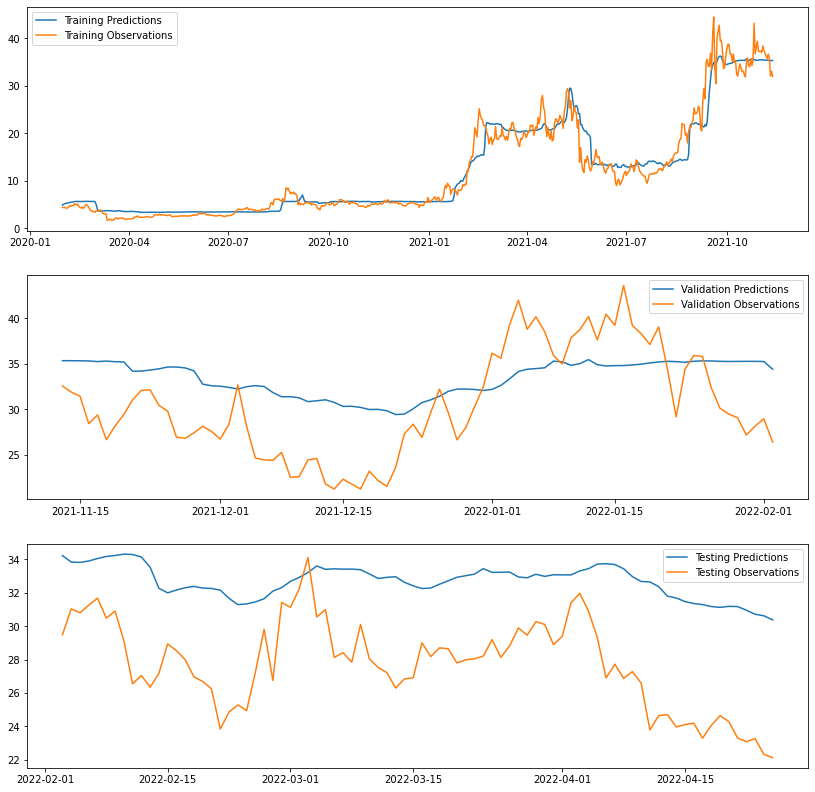

In [23]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## Recursive Predictions

In [24]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

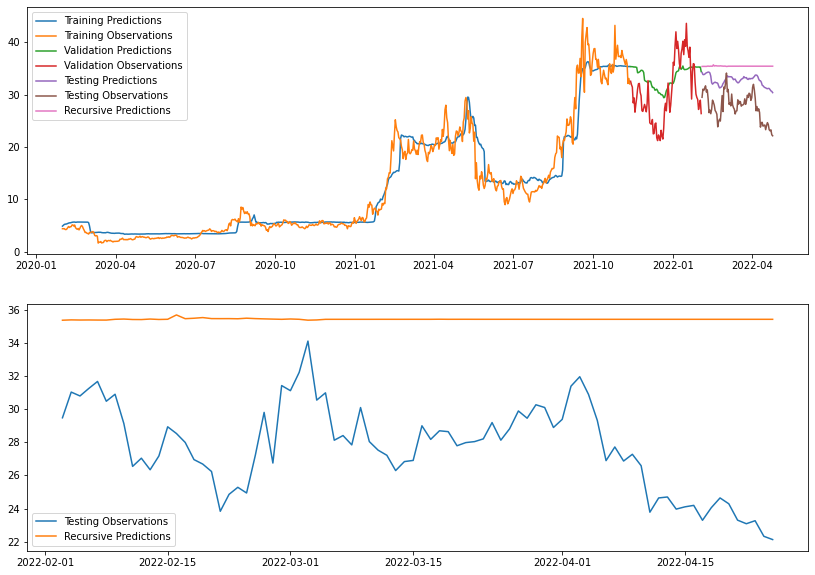

In [25]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
              'Training Observations',
              'Validation Predictions', 
              'Validation Observations',
              'Testing Predictions', 
              'Testing Observations',
              'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')